<a href="https://colab.research.google.com/github/KimRRRich/PytorchExercise/blob/main/01_pytorch_workflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(torch.__version__)

2.4.1+cu121


In [6]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [7]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

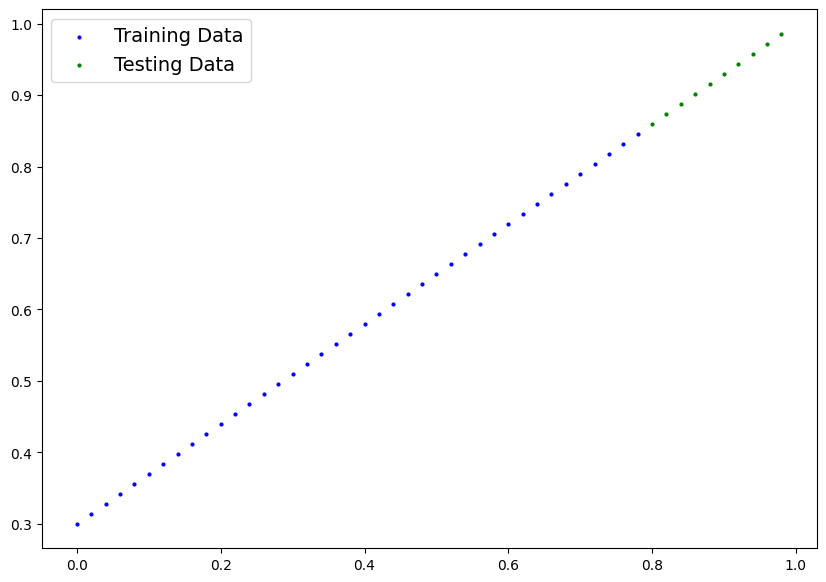

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Prediction Data")

  plt.legend(prop={"size":14})


plot_predictions()


In [9]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
  def forward(self,x):
    return x*self.weights+self.bias


In [10]:
torch.manual_seed(518)

model_0 = LinearRegressionModel()

list(model_0.parameters())


[Parameter containing:
 tensor([-1.0144], requires_grad=True),
 Parameter containing:
 tensor([1.2508], requires_grad=True)]

In [11]:
print(model_0.state_dict())

OrderedDict([('weights', tensor([-1.0144])), ('bias', tensor([1.2508]))])


In [12]:
with torch.inference_mode():
  y_preds = model_0(X_test)
  print(model_0.weights,model_0.bias)
  print(X_test)
  print(y_preds)
  print(y_test)


Parameter containing:
tensor([-1.0144], requires_grad=True) Parameter containing:
tensor([1.2508], requires_grad=True)
tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
tensor([[0.4393],
        [0.4190],
        [0.3987],
        [0.3784],
        [0.3582],
        [0.3379],
        [0.3176],
        [0.2973],
        [0.2770],
        [0.2567]])
tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


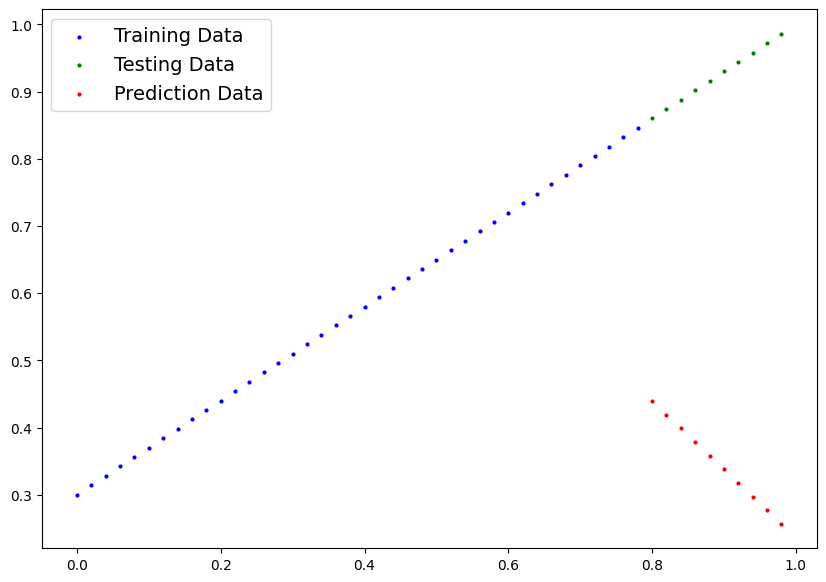

In [13]:
plot_predictions(predictions=y_preds)

In [14]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [20]:
epochs = 2000

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_pred=model_0(X_test)
    test_loss=loss_fn(test_pred,y_test.type(torch.float))
    if epoch%10==0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      # plot_predictions(predictions=y_pred)
      print(f"Epoch:{epoch} | MAE Train Loss:{loss} | MAE Test Loss:{test_loss}")

Epoch:0 | MAE Train Loss:0.018796546384692192 | MAE Test Loss:0.043482184410095215
Epoch:10 | MAE Train Loss:0.01536810677498579 | MAE Test Loss:0.03520963713526726
Epoch:20 | MAE Train Loss:0.011929512955248356 | MAE Test Loss:0.026937108486890793
Epoch:30 | MAE Train Loss:0.008494613692164421 | MAE Test Loss:0.01935144141316414
Epoch:40 | MAE Train Loss:0.005064693745225668 | MAE Test Loss:0.011078906245529652
Epoch:50 | MAE Train Loss:0.002079153899103403 | MAE Test Loss:0.008915727958083153
Epoch:60 | MAE Train Loss:0.00694663543254137 | MAE Test Loss:0.008915727958083153
Epoch:70 | MAE Train Loss:0.00694663543254137 | MAE Test Loss:0.008915727958083153
Epoch:80 | MAE Train Loss:0.00694663543254137 | MAE Test Loss:0.008915727958083153
Epoch:90 | MAE Train Loss:0.00694663543254137 | MAE Test Loss:0.008915727958083153
Epoch:100 | MAE Train Loss:0.00694663543254137 | MAE Test Loss:0.008915727958083153
Epoch:110 | MAE Train Loss:0.00694663543254137 | MAE Test Loss:0.008915727958083153


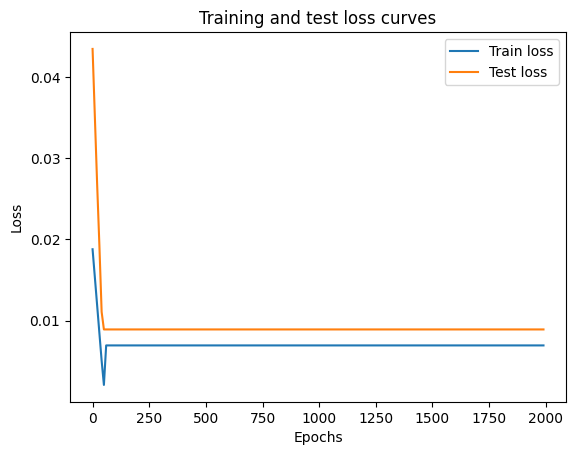

In [21]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [22]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6952])), ('bias', tensor([0.3088]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


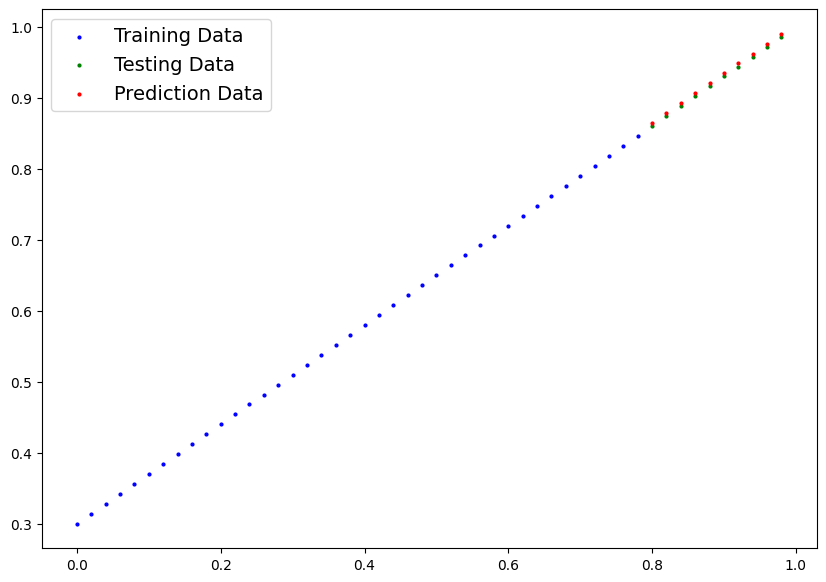

In [23]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
  plot_predictions(predictions=y_preds)

In [24]:
from pathlib import Path
import torch

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to:models/01_pytorch_workflow_model_0.pth


In [26]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

print(f"Loaded model:\n{loaded_model_0}")
print(f"Model on device:\n{next(loaded_model_0.parameters()).device}")

Loaded model:
LinearRegressionModel()
Model on device:
cpu


<ipython-input-26-602f028584bd>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))


In [1]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.4.1+cu121'

In [10]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [2]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

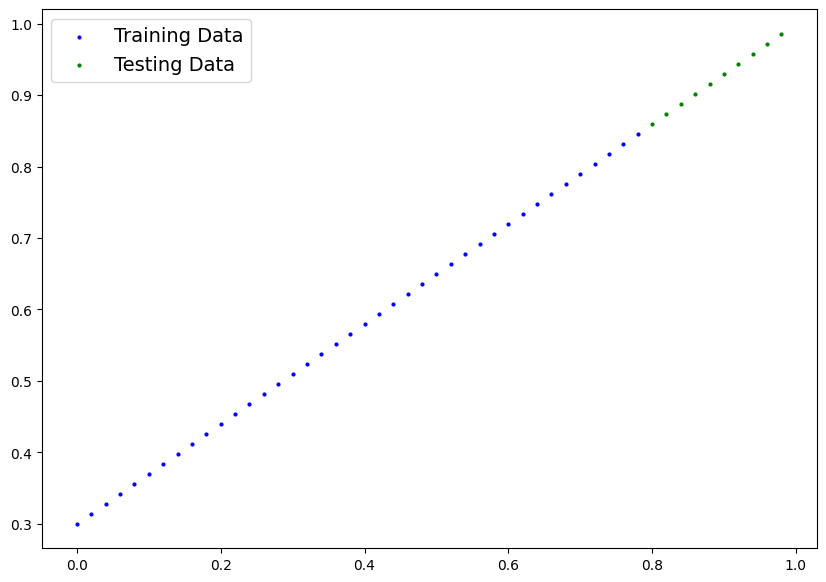

In [6]:
# Note: If you've reset your runtime, this function won't work,
# you'll have to rerun the cell above where it's instantiated.
plot_predictions(X_train, y_train, X_test, y_test)

In [7]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self,x):
    return self.linear_layer(x)


torch.manual_seed(518)
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.8396]])),
              ('linear_layer.bias', tensor([-0.7321]))]))

In [8]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [11]:
model_1.to(device)
# Check model device
next(model_1.parameters()).device

device(type='cuda', index=0)

In [12]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [16]:
torch.manual_seed(518)

epoches = 2000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epoches):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    if(epoch % 100 == 0):
      print(f"Epoch:{epoch} | Train Loss:{loss} | Test Loss:{test_loss}")

Epoch:0 | Train Loss:0.009218811988830566 | Test Loss:0.000634354364592582
Epoch:100 | Train Loss:0.009218811988830566 | Test Loss:0.000634354364592582
Epoch:200 | Train Loss:0.009218811988830566 | Test Loss:0.000634354364592582
Epoch:300 | Train Loss:0.009218811988830566 | Test Loss:0.000634354364592582
Epoch:400 | Train Loss:0.009218811988830566 | Test Loss:0.000634354364592582
Epoch:500 | Train Loss:0.009218811988830566 | Test Loss:0.000634354364592582
Epoch:600 | Train Loss:0.009218811988830566 | Test Loss:0.000634354364592582
Epoch:700 | Train Loss:0.009218811988830566 | Test Loss:0.000634354364592582
Epoch:800 | Train Loss:0.009218811988830566 | Test Loss:0.000634354364592582
Epoch:900 | Train Loss:0.009218811988830566 | Test Loss:0.000634354364592582
Epoch:1000 | Train Loss:0.009218811988830566 | Test Loss:0.000634354364592582
Epoch:1100 | Train Loss:0.009218811988830566 | Test Loss:0.000634354364592582
Epoch:1200 | Train Loss:0.009218811988830566 | Test Loss:0.00063435436459258

In [14]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.7098]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3054], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


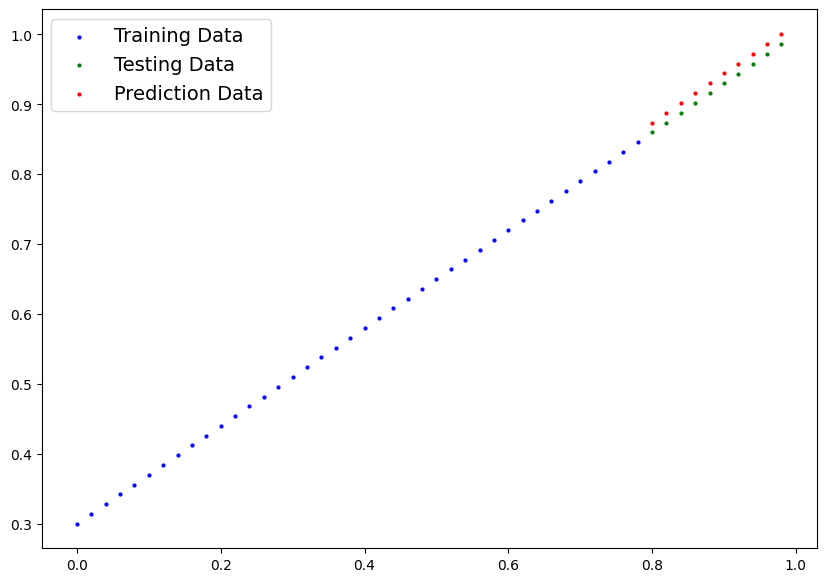

In [17]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds
# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())